In [1]:
%load_ext autoreload
%autoreload 2
    
import pandas as pd
pd.set_option('display.max_rows', 100)

import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import seaborn as sns

from utils import *

import sys
sys.path.append("../")

# Shows files

In [2]:
config_names = [
   "MESSI",
   "MESSI+\nSFA+ED+\nSIMD",
   "MESSI+\nSFA+EW+\nSIMD"
]

        
path = "logs/MESSI_SFA_logs_knn"
all_files = read_logs(log_type="query", path=path, config_names = config_names)

Config logs/MESSI_SFA_logs_knn/ASTRO/1
Config logs/MESSI_SFA_logs_knn/ASTRO/10
Config logs/MESSI_SFA_logs_knn/ASTRO/20
Config logs/MESSI_SFA_logs_knn/ASTRO/3
Config logs/MESSI_SFA_logs_knn/ASTRO/5
Config logs/MESSI_SFA_logs_knn/ASTRO/50
-----------------
Config logs/MESSI_SFA_logs_knn/BIGANN/1
Config logs/MESSI_SFA_logs_knn/BIGANN/10
Config logs/MESSI_SFA_logs_knn/BIGANN/20
Config logs/MESSI_SFA_logs_knn/BIGANN/3
Config logs/MESSI_SFA_logs_knn/BIGANN/5
Config logs/MESSI_SFA_logs_knn/BIGANN/50
-----------------
Config logs/MESSI_SFA_logs_knn/DEEP1b/1
Config logs/MESSI_SFA_logs_knn/DEEP1b/10
Config logs/MESSI_SFA_logs_knn/DEEP1b/20
Config logs/MESSI_SFA_logs_knn/DEEP1b/3
Config logs/MESSI_SFA_logs_knn/DEEP1b/5
Config logs/MESSI_SFA_logs_knn/DEEP1b/50
-----------------
Config logs/MESSI_SFA_logs_knn/ETHC/1
Config logs/MESSI_SFA_logs_knn/ETHC/10
Config logs/MESSI_SFA_logs_knn/ETHC/20
Config logs/MESSI_SFA_logs_knn/ETHC/3
Config logs/MESSI_SFA_logs_knn/ETHC/5
Config logs/MESSI_SFA_logs_knn/

In [3]:
query_times = pd.DataFrame(columns=["method", "querying time", "config", "dataset"])

i = 0
for ds_name, files in all_files.items():
    df_all = pd.DataFrame()
    # print (file.split("/")[2])
    for name, file in files.items():

        # display(df.head())
        df = pd.read_csv(file).iloc[:-1]  # last entry is the average        
        df["querying time"] = df["querying time"] / 1_000_000        
        df["method"] = name
        df["config"] = np.int32(file.split("/")[3])
        df["dataset"] = file.split("/")[2]

        query_times = pd.concat([query_times, df[["method", "querying time", "config", "dataset"]]], ignore_index=True)
        i = i+1        
        
np.unique(query_times.dataset)

array(['ASTRO', 'BIGANN', 'DEEP1b', 'ETHC', 'ISC_EHB_DepthPhases',
       'Iquique', 'LenDB', 'Meier2019JGR', 'NEIC', 'OBS', 'OBST2024',
       'PNW', 'SALD', 'SCEDC', 'SIFT1b', 'STEAD', 'TXED'], dtype=object)

In [4]:
subset = query_times.rename(columns={
    "config":"kNNs", "dataset": "Dataset", "method": "Method",
    "querying time" : "query time in s"})
subset = subset[query_times.method.isin([ "MESSI", "MESSI+\nSFA+ED+\nSIMD", "MESSI+\nSFA+EW+\nSIMD"])]


subset.Method.replace("MESSI+\nSFA+ED+\nSIMD", "SOFA + ED", inplace=True)
subset.Method.replace("MESSI+\nSFA+EW+\nSIMD", "SOFA + EW", inplace=True)

subset.head()

,Method,query time in s,kNNs,Dataset
0,MESSI,0.006146,1,ASTRO
1,MESSI,0.006227,1,ASTRO
2,MESSI,0.006009,1,ASTRO
3,MESSI,0.005198,1,ASTRO
4,MESSI,0.005999,1,ASTRO


In [5]:
FAISS_all_files = read_faiss_logs_knn()
FAISS_query_times = pd.DataFrame(columns=["Method", "query time in s", "Dataset"])

i = 0
for ds_name, files in FAISS_all_files.items():
    df_all = pd.DataFrame()
    for kNNs, file in files.items():
        # if kNNs != str(50):
            # print(kNNs)
            df = pd.read_csv(file) #.iloc[:-1]
            # display(df)
            df["query time in s"] = df[" total"] / 100 / 1000
            df["Method"] = "FAISS"
            df["kNNs"] = kNNs
            name = file.split("/")[2]
            df["Dataset"] = name[name.find("_")+1:name.rfind("_")]
            
            df_all = pd.concat([df_all, df], ignore_index=True)        
            FAISS_query_times = pd.concat([
                FAISS_query_times, df[["Method", "query time in s", "kNNs", "Dataset"]]], ignore_index=True)
            i = i+1
        
FAISS_query_times

,Method,query time in s,Dataset,kNNs
0,FAISS,0.439689,ASTRO_10,10
1,FAISS,0.439689,ASTRO_10,10
2,FAISS,0.439689,ASTRO_10,10
3,FAISS,0.439689,ASTRO_10,10
4,FAISS,0.439689,ASTRO_10,10
...,...,...,...,...
10195,FAISS,0.404351,TXED_5,5
10196,FAISS,0.404351,TXED_5,5
10197,FAISS,0.404351,TXED_5,5
10198,FAISS,0.404351,TXED_5,5


In [6]:
subset = pd.concat([subset, FAISS_query_times], ignore_index=True)    # 
subset

,Method,query time in s,kNNs,Dataset
0,MESSI,0.006146,1,ASTRO
1,MESSI,0.006227,1,ASTRO
2,MESSI,0.006009,1,ASTRO
3,MESSI,0.005198,1,ASTRO
4,MESSI,0.005999,1,ASTRO
...,...,...,...,...
40795,FAISS,0.404351,5,TXED_5
40796,FAISS,0.404351,5,TXED_5
40797,FAISS,0.404351,5,TXED_5
40798,FAISS,0.404351,5,TXED_5


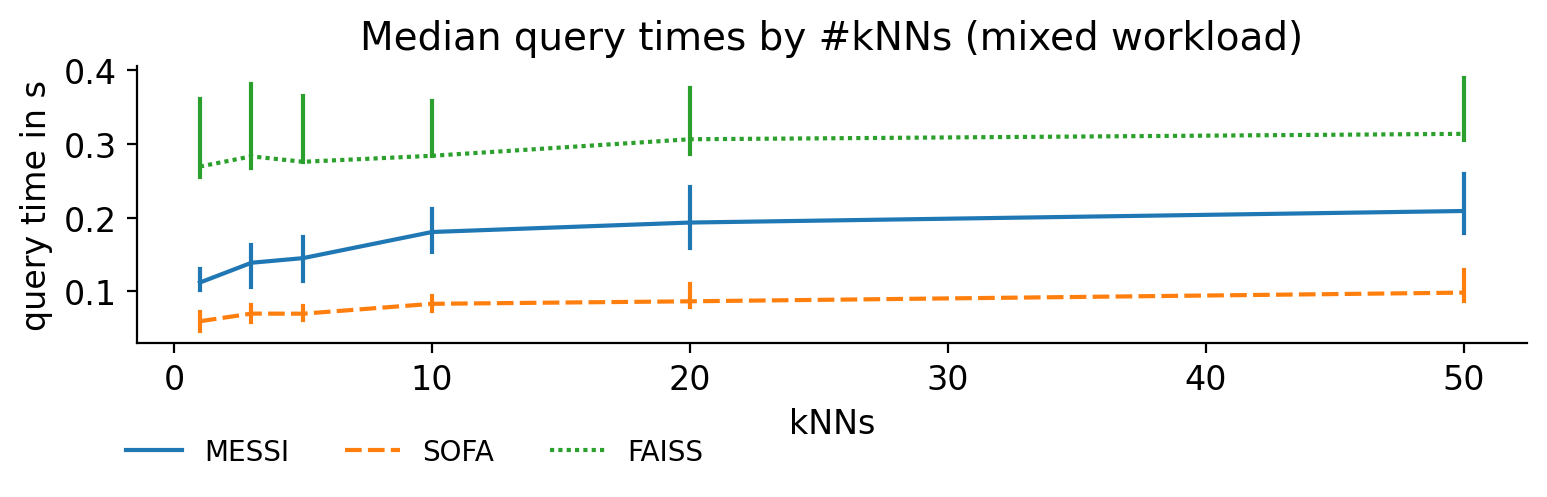

In [19]:
df_sub = subset[subset.Method.isin(["MESSI", "SOFA + EW", "FAISS"])]
df_sub.loc[df_sub.Method == "SOFA + EW", "Method"] = "SOFA"


with plt.style.context({
    'font.size': 16,          # Default font size
    'axes.titlesize': 14,     # Font size for axes titles
    'axes.labelsize': 12,     # Font size for x and y labels
    'xtick.labelsize': 12,    # Font size for x tick labels
    'ytick.labelsize': 12,    # Font size for y tick labels
    'legend.fontsize': 10,    # Font size for legend
    'figure.titlesize': 14    # Font size for figure title
}):
    fig, ax = plt.subplots(figsize=(8,3))
    sns.lineplot(x="kNNs", y="query time in s", hue="Method", estimator=np.median,  err_style="bars", 
                 style="Method", data=df_sub, ax = ax, errorbar=('ci', 99))
    ax.set_title("Median query times by #kNNs (mixed workload)")
    ax.set_xlabel("kNNs")

    # ax.set_xlabel("Leaf Size")
    sns.despine()
    legend = ax.legend() # removes the title
        
    sns.move_legend(ax, "upper center", frameon=False, bbox_to_anchor=(.2, -0.25), ncol=4)
    plt.tight_layout()
    

    plt.savefig("images/experiment_scalability_median_knns.pdf", bbox_inches='tight')
    #ax.set_yscale("log")
    plt.show()

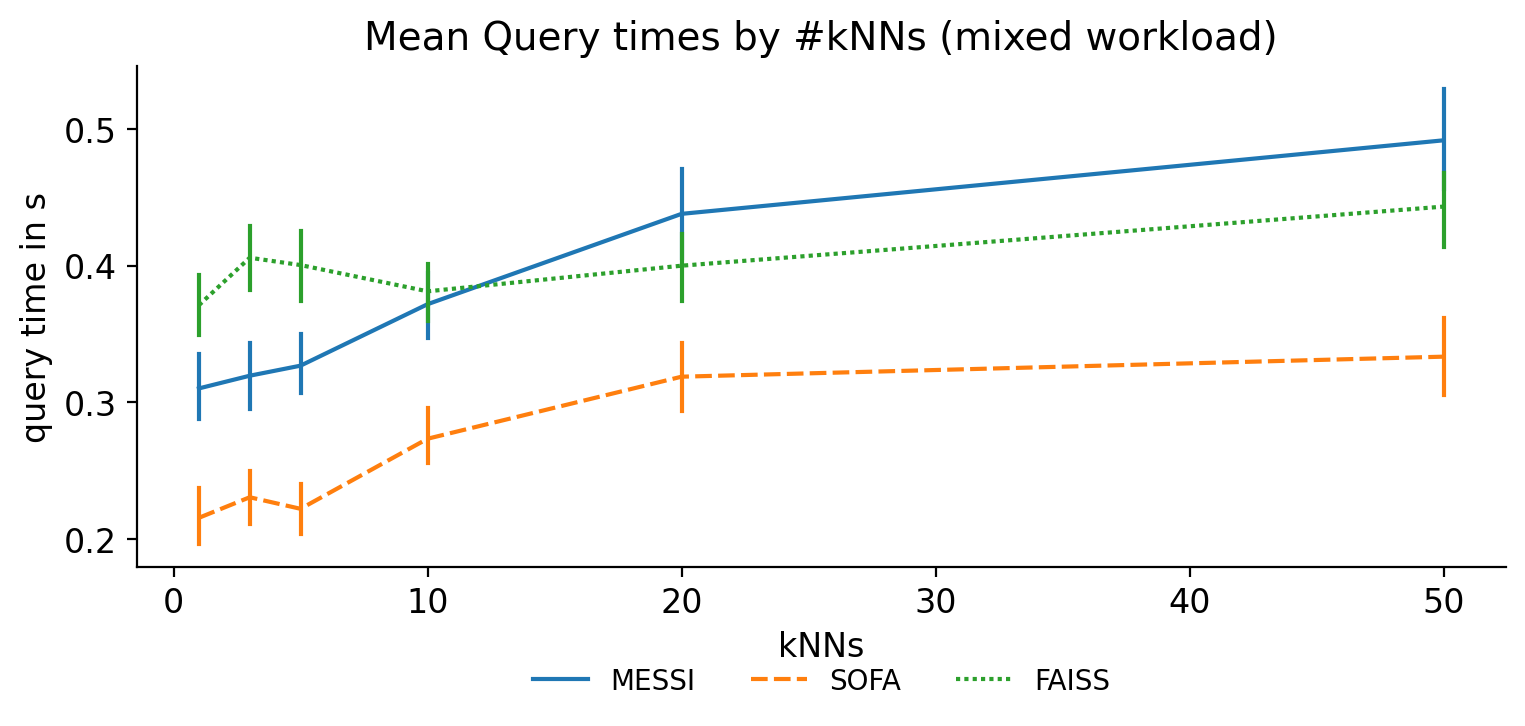

In [8]:
df_sub = subset[subset.Method.isin(["MESSI", "SOFA + EW", "FAISS"])]
df_sub.loc[df_sub.Method == "SOFA + EW", "Method"] = "SOFA"



with plt.style.context({
    'font.size': 16,          # Default font size
    'axes.titlesize': 14,     # Font size for axes titles
    'axes.labelsize': 12,     # Font size for x and y labels
    'xtick.labelsize': 12,    # Font size for x tick labels
    'ytick.labelsize': 12,    # Font size for y tick labels
    'legend.fontsize': 10,    # Font size for legend
    'figure.titlesize': 14    # Font size for figure title
}):
    fig, ax = plt.subplots(figsize=(8,4))
    sns.lineplot(x="kNNs", y="query time in s", hue="Method", estimator=np.mean,  err_style="bars", 
                 style="Method", data=df_sub, ax = ax, errorbar=('ci', 99))
    ax.set_title("Mean Query times by #kNNs (mixed workload)")
    ax.set_xlabel("kNNs")
    sns.despine()
    sns.despine()
    legend = ax.legend() # removes the title
        
    sns.move_legend(ax, "upper center", frameon=False, bbox_to_anchor=(.5, -0.15), ncol=4)
    plt.tight_layout()
    

    #ax.set_yscale("log")
    plt.savefig("images/experiment_scalability_mean_knns.pdf", bbox_inches='tight')
    plt.show()

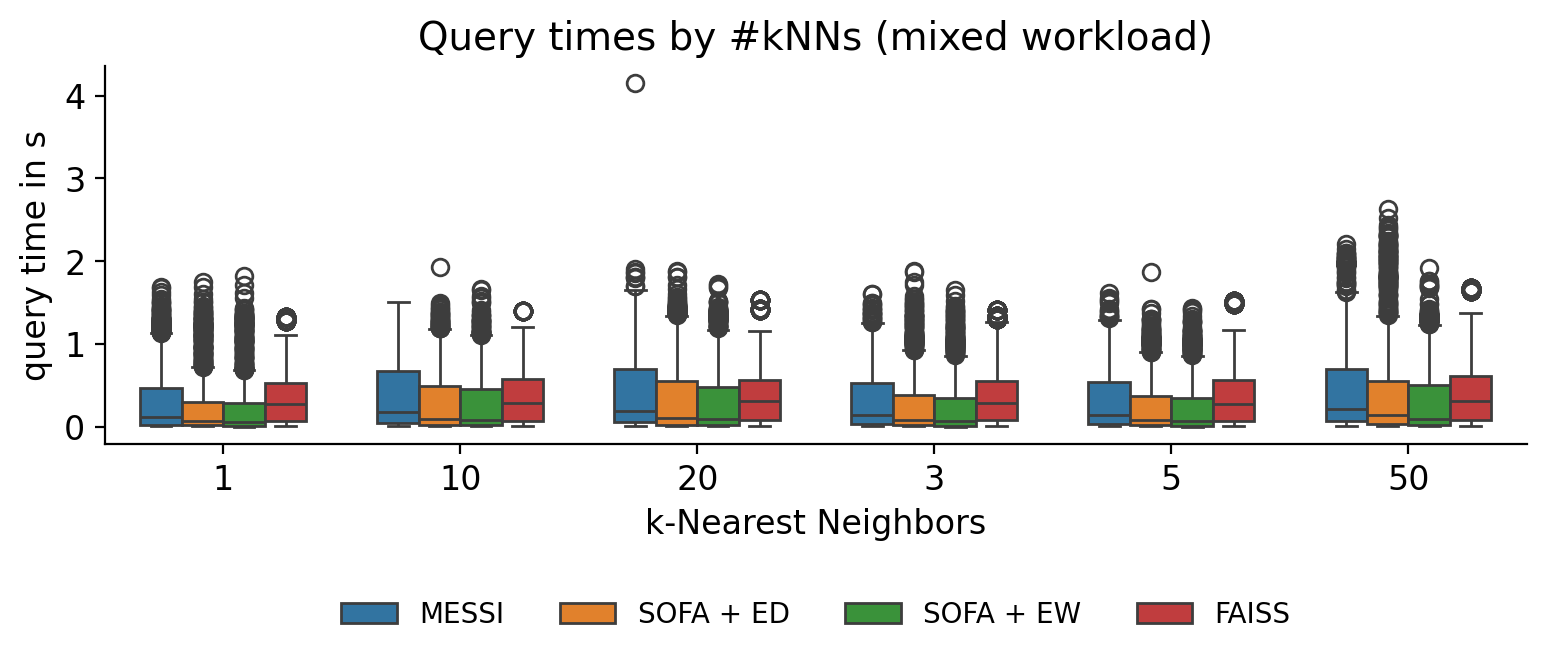

In [9]:

with plt.style.context({
    'font.size': 16,          # Default font size
    'axes.titlesize': 14,     # Font size for axes titles
    'axes.labelsize': 12,     # Font size for x and y labels
    'xtick.labelsize': 12,    # Font size for x tick labels
    'ytick.labelsize': 12,    # Font size for y tick labels
    'legend.fontsize': 10,    # Font size for legend
    'figure.titlesize': 14    # Font size for figure title
}):
    fig, ax = plt.subplots(figsize=(8,4))
    ax.set_title("Query times by #kNNs (mixed workload)")
    ax.set_xlabel("k-Nearest Neighbors")
    sns.despine()
    # ax.set_yscale("log")
    
    sns.boxplot(hue="Method", y="query time in s", x="kNNs", data=subset, width=0.7)
    
    legend = ax.legend() # removes the title
    
    sns.move_legend(ax, "upper center", frameon=False, bbox_to_anchor=(.5, -0.35), ncol=4)
    plt.tight_layout()

        
    plt.savefig("images/experiment_boxplot_mean_kNNs.pdf", bbox_inches='tight')
    plt.show()



In [10]:
result_median = subset.groupby(["Method","kNNs"])["query time in s"].median().transform(lambda l: str(np.round(l * 1000))+" ms")
result_median

Method     kNNs
FAISS      1       269.0 ms
           10      284.0 ms
           20      307.0 ms
           3       283.0 ms
           5       276.0 ms
           50      314.0 ms
MESSI      1       112.0 ms
           3       139.0 ms
           5       145.0 ms
           10      181.0 ms
           20      193.0 ms
           50      209.0 ms
SOFA + ED  1        71.0 ms
           3        84.0 ms
           5        84.0 ms
           10       96.0 ms
           20      110.0 ms
           50      142.0 ms
SOFA + EW  1        60.0 ms
           3        70.0 ms
           5        70.0 ms
           10       83.0 ms
           20       87.0 ms
           50       98.0 ms
Name: query time in s, dtype: object

In [11]:
result_mean = subset.groupby(["Method","kNNs"])["query time in s"].mean().transform(lambda l: str(np.round(l * 1000))+" ms")
result_mean

Method     kNNs
FAISS      1       371.0 ms
           10      381.0 ms
           20      400.0 ms
           3       406.0 ms
           5       400.0 ms
           50      443.0 ms
MESSI      1       310.0 ms
           3       320.0 ms
           5       327.0 ms
           10      372.0 ms
           20      438.0 ms
           50      492.0 ms
SOFA + ED  1       234.0 ms
           3       254.0 ms
           5       240.0 ms
           10      296.0 ms
           20      357.0 ms
           50      407.0 ms
SOFA + EW  1       216.0 ms
           3       231.0 ms
           5       222.0 ms
           10      273.0 ms
           20      319.0 ms
           50      333.0 ms
Name: query time in s, dtype: object

In [12]:
result_all = pd.concat([result_median, result_mean], axis=1)
print(result_all.T)

Method              FAISS                                                    \
kNNs                    1        10        20         3         5        50   
query time in s  269.0 ms  284.0 ms  307.0 ms  283.0 ms  276.0 ms  314.0 ms   
query time in s  371.0 ms  381.0 ms  400.0 ms  406.0 ms  400.0 ms  443.0 ms   

Method              MESSI                                ... SOFA + ED  \
kNNs                    1         3         5        10  ...         5   
query time in s  112.0 ms  139.0 ms  145.0 ms  181.0 ms  ...   84.0 ms   
query time in s  310.0 ms  320.0 ms  327.0 ms  372.0 ms  ...  240.0 ms   

Method                                        SOFA + EW                      \
kNNs                   10        20        50         1         3         5   
query time in s   96.0 ms  110.0 ms  142.0 ms   60.0 ms   70.0 ms   70.0 ms   
query time in s  296.0 ms  357.0 ms  407.0 ms  216.0 ms  231.0 ms  222.0 ms   

Method                                         
kNNs                 

In [13]:
result_median

Method     kNNs
FAISS      1       269.0 ms
           10      284.0 ms
           20      307.0 ms
           3       283.0 ms
           5       276.0 ms
           50      314.0 ms
MESSI      1       112.0 ms
           3       139.0 ms
           5       145.0 ms
           10      181.0 ms
           20      193.0 ms
           50      209.0 ms
SOFA + ED  1        71.0 ms
           3        84.0 ms
           5        84.0 ms
           10       96.0 ms
           20      110.0 ms
           50      142.0 ms
SOFA + EW  1        60.0 ms
           3        70.0 ms
           5        70.0 ms
           10       83.0 ms
           20       87.0 ms
           50       98.0 ms
Name: query time in s, dtype: object